# Mask Generation with OpenCV
In the paper they generate irregular masks by using occlusion/dis-occlusion between two consecutive frames of videos, as described in [this paper](https://lmb.informatik.uni-freiburg.de/Publications/2010/Bro10e/sundaram_eccv10.pdf). 

Instead we'll simply be using OpenCV to generate some irregular masks, which will hopefully perform just as well.

In [11]:
from random import randint
import itertools

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

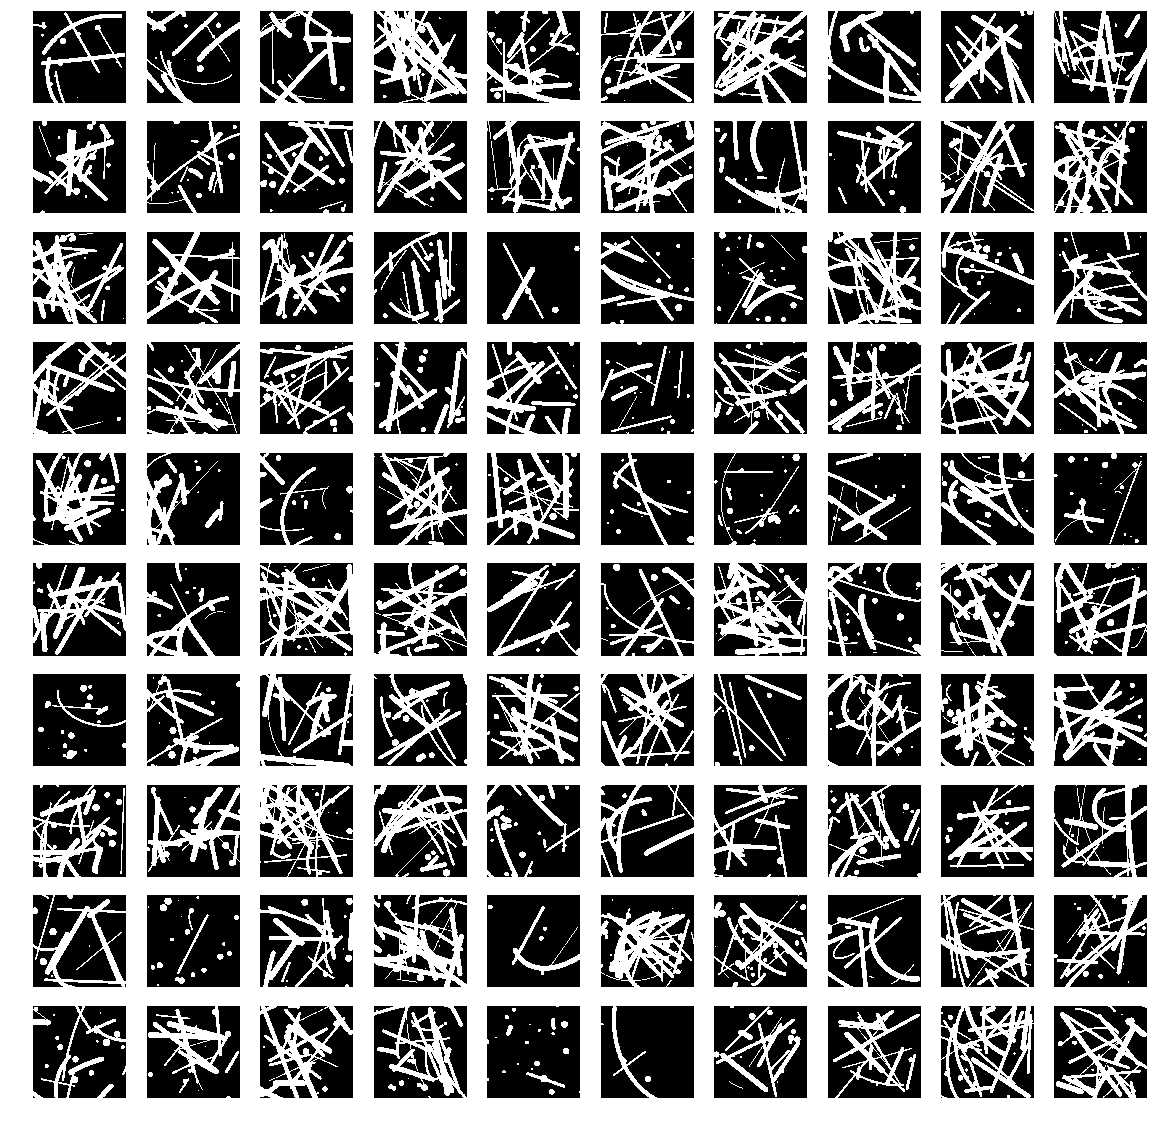

In [48]:
def random_mask(im_size, max_thick=30):
    img = np.zeros((im_size, im_size), np.uint8)
    
    # Draw random lines
    for _ in range(randint(1, 20)):
        x1, x2 = randint(1, im_size), randint(1, im_size)
        y1, y2 = randint(1, im_size), randint(1, im_size)
        thickness = randint(3, max_thick)
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),thickness)
        
    # Draw random circles
    for _ in range(randint(1, 20)):
        x1, y1 = randint(1, im_size), randint(1, im_size)
        radius = randint(3, 20)
        cv2.circle(img,(x1,y1),radius,(255,0,0), -1)
        
    # Draw random ellipses
    for _ in range(randint(1, 20)):
        x1, y1 = randint(1, im_size), randint(1, im_size)
        s1, s2 = randint(1, im_size), randint(1, im_size)
        a1, a2, a3 = randint(3, 180), randint(3, 180), randint(3, 180)
        thickness = randint(3, max_thick)
        cv2.ellipse(img, (x1,y1), (s1,s2), a1, a2, a3,255, thickness)
    
    return img

# Plot the results
_, axes = plt.subplots(10, 10, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))
for i in range(len(axes)):
    
    # Generate image
    img = random_mask(500)
    
    # Plot image on axis
    norm = matplotlib.colors.Normalize(vmin=0, vmax=255, clip=True)
    axes[i].imshow(img, cmap=plt.cm.gray, norm=norm)
    axes[i].axis('off');